## Scheduling Method by Student Classification: Upper Classman vs Upperclassman 

##### - what are the existing methods that students are using to make plans? 
##### - do those methods vary by classification? 

In [48]:
#Documentation: https://pandas.pydata.org/docs/getting_started/intro_tutorials/04_plotting.html

import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

import plotly.io as pio


# Renamed headings in Google Sheets. Legend can be written in the readme file on GitHub for doc purposes
df = pd.read_csv('data/data_byclass.csv') #ordered by class in file 

# filter the classification and info_methods
classification = df[['classification', 'info_methods']]

# count how many people 

classification.head()

,classification,info_methods
0,Underclassman,"Friends, Social media, School emails, Flyers"
1,Underclassman,"Friends, School emails"
2,Underclassman,"Friends, School emails"
3,Underclassman,"Friends, School emails, Flyers"
4,Underclassman,"Friends, Engage"


In [26]:
df.head()

,classification,housing_type,carOwner,freq_social_oncampus,freq_social_offcampus,info_methods,apps_used,cal_type,challenges_oncampus,challenges_offcampus,trans_diffic
0,Underclassman,On-campus,No,Daily,Monthly,"Friends, Social media, School emails, Flyers","Instagram, Facebook, Whatsapp",I did not use a calendar,"Lack of information, Time conflicts","Event timing/availability, Finding transportation",4
1,Underclassman,On-campus,No,Daily,Weekly,"Friends, School emails",Whatsapp,I did not use a calendar,Event timing/availability,Event timing/availability,2
2,Underclassman,On-campus,No,Weekly,Rarely,"Friends, School emails",Instagram,I did not use a calendar,Time conflicts,Finding transportation,4
3,Underclassman,On-campus,No,Weekly,Daily,"Friends, School emails, Flyers","Instagram, Whatsapp",Digital calendar (Google /Apple/Outlook Calendar),"Lack of information, Event timing/availability","Event timing/availability, Finding transportation",4
4,Underclassman,On-campus,No,Weekly,Monthly,"Friends, Engage","Instagram, Whatsapp",Digital calendar (Google /Apple/Outlook Calendar),"Time conflicts, Finding transportation",Finding transportation,5


In [42]:
methods = ['Friends', 'Social media','School emails', 'Flyers','Engage','Church']
classification_order = ['Underclassman', 'Upperclassman']

for eachclass in classification_order:
    for eachapp in methods:
        temp_count = classification[(classification['classification'] == eachclass) &  (classification['info_methods'].str.contains(eachapp))]
        print(eachapp, eachclass, temp_count.size)
    print ('....')

Friends Underclassman 50
Social media Underclassman 20
School emails Underclassman 44
Flyers Underclassman 18
Engage Underclassman 2
Church Underclassman 0
....
Friends Upperclassman 62
Social media Upperclassman 24
School emails Upperclassman 52
Flyers Upperclassman 26
Engage Upperclassman 0
Church Upperclassman 2
....


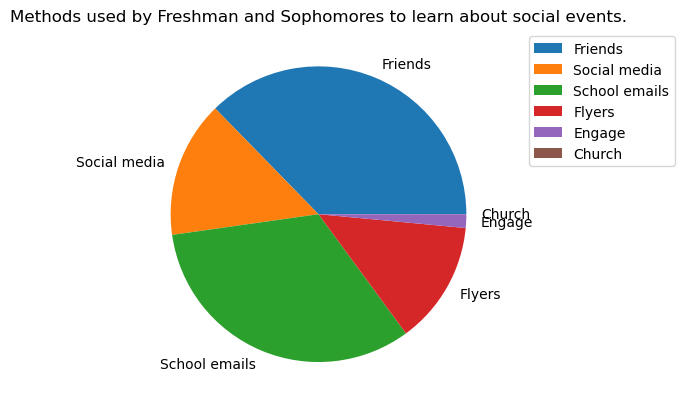

In [44]:
#resources: https://www.w3schools.com/python/matplotlib_pie_charts.asp 

y = np.array([50, 20, 44, 18,2,0])

plt.pie(y, labels = methods)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("Methods used by Freshman and Sophomores to learn about social events.")
plt.show() 

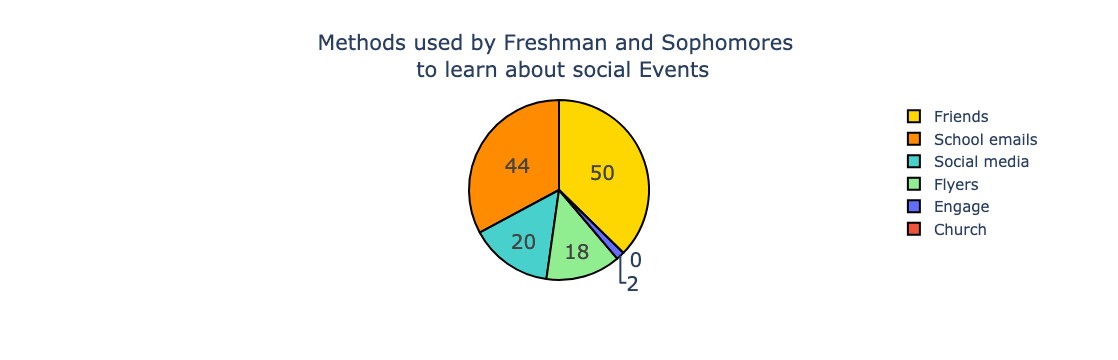

In [58]:
#source: https://plotly.com/python/pie-charts/

import plotly.graph_objects as go
colors = ['gold', 'mediumturquoise', 'darkorange', 'lightgreen']

fig = go.Figure(data=[go.Pie(labels=['Friends', 'Social media','School emails', 'Flyers','Engage','Church'],
                             values=[50, 20, 44, 18,2,0])])
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))
# fig.update_layout(title_text= "Methods used by Freshman and Sophomores <br>to learn about social events<br>", font_size=15) 
fig.update_layout(
    title={
        'text': "Methods used by Freshman and Sophomores <br> to learn about Social Events<br>",
        'x': 0.5, 
        'xanchor': 'center' 
    },
    font_size=15
)


fig.show()
pio.write_image(fig, 'methods.png', width=700, height=775)

## Upperclassmen methods

In [ ]:
Friends Upperclassman 62
Social media Upperclassman 24
School emails Upperclassman 52
Flyers Upperclassman 26
Engage Upperclassman 0
Church Upperclassman 2

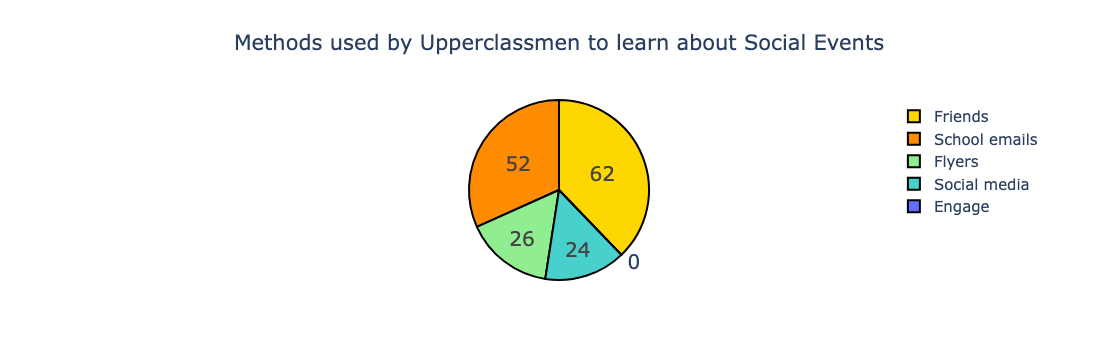

In [62]:

import plotly.graph_objects as go
colors = ['gold', 'mediumturquoise', 'darkorange', 'lightgreen']

fig = go.Figure(data=[go.Pie(labels=['Friends', 'Social media','School emails', 'Flyers','Engage',],
                             values=[62, 24, 52, 26,0,0,2])])
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))
# fig.update_layout(title_text= "Methods used by Freshman and Sophomores <br>to learn about social events<br>", font_size=15) 
fig.update_layout(
    title={
        'text': "Methods used by Upperclassmen to learn about Social Events",
        'x': 0.5, 
        'xanchor': 'center' 
    },
    font_size=15
)


fig.show()
pio.write_image(fig, 'upperclassmen.png', width=700, height=775)

## Apps used for organizing meetups by classification


### Sankey/Alluvial diagram
Column variables used: 
- classification
- apps_used

Tutorials used: 
- https://www.geeksforgeeks.org/sankey-diagram-using-plotly-in-python/ 
- https://www.geeksforgeeks.org/getting-started-with-plotly-python/

In [1]:
import plotly.graph_objects as go
import pandas as pd

#### data prep

In [2]:
df = pd.read_csv('data/cleaned_data_allresponses_asof12_29.csv') 
sankeydata = df[["classification", "apps_used"]]
sankeydata.head()

,classification,apps_used
0,Senior (Fourth Year),Instagram
1,Senior (Fourth Year),Outlook
2,First Year (First Year),"Instagram, Facebook, Whatsapp"
3,Senior (Fourth Year),Instagram
4,Senior (Fourth Year),"Instagram, Facebook, Whatsapp, iMessage"


In [3]:
type(sankeydata)

pandas.core.frame.DataFrame

### Count of survey participants by classification 

In [4]:
fresh_count = sankeydata['classification'].value_counts().get('Freshman (First Year)', 0) # typo on this label, check later
soph_count = sankeydata['classification'].value_counts().get('Sophomore (Second Year)', 0)
jun_count = sankeydata['classification'].value_counts().get('Junior (Third Year)', 0)
sen_count = sankeydata['classification'].value_counts().get('Senior (Fourth Year)', 0)
supsen_count = sankeydata['classification'].value_counts().get('Super senior (4+)', 0)

print ("1st year: " + str(fresh_count))
print ("2nd year: " + str(soph_count))
print ("3rd year: " + str(jun_count))
print ("4th year: " + str(sen_count))
print ("4+ year: " + str(supsen_count))

1st year: 13
2nd year: 16
3rd year: 15
4th year: 17
4+ year: 5


### Count of social media use by classification

In [30]:
apps_responses = ['Instagram', 'Facebook','Whatsapp', 'Outlook','Snapchat','Word of mouth from friends', 'none']
classification_order = ['Freshman (First Year)', 'Sophomore (Second Year)', 'Junior (Third Year)', 'Senior (Fourth Year)', 'Super senior (4+)']

for eachclass in classification_order:
    for eachapp in apps_responses:
        temp_count = sankeydata[(sankeydata['classification'] == eachclass) &  (sankeydata['apps_used'].str.contains(eachapp))]
        print(eachapp, eachclass, temp_count.size)
    print ('....')

Instagram First Year (First Year) 20
Facebook First Year (First Year) 2
Whatsapp First Year (First Year) 10
Outlook First Year (First Year) 4
Snapchat First Year (First Year) 6
Word of mouth from friends First Year (First Year) 0
none First Year (First Year) 0
....
Instagram Sophomore (Second Year) 28
Facebook Sophomore (Second Year) 10
Whatsapp Sophomore (Second Year) 18
Outlook Sophomore (Second Year) 0
Snapchat Sophomore (Second Year) 12
Word of mouth from friends Sophomore (Second Year) 0
none Sophomore (Second Year) 0
....
Instagram Junior (Third Year) 12
Facebook Junior (Third Year) 6
Whatsapp Junior (Third Year) 12
Outlook Junior (Third Year) 0
Snapchat Junior (Third Year) 4
Word of mouth from friends Junior (Third Year) 2
none Junior (Third Year) 2
....
Instagram Senior (Fourth Year) 24
Facebook Senior (Fourth Year) 14
Whatsapp Senior (Fourth Year) 10
Outlook Senior (Fourth Year) 2
Snapchat Senior (Fourth Year) 0
Word of mouth from friends Senior (Fourth Year) 0
none Senior (Fo

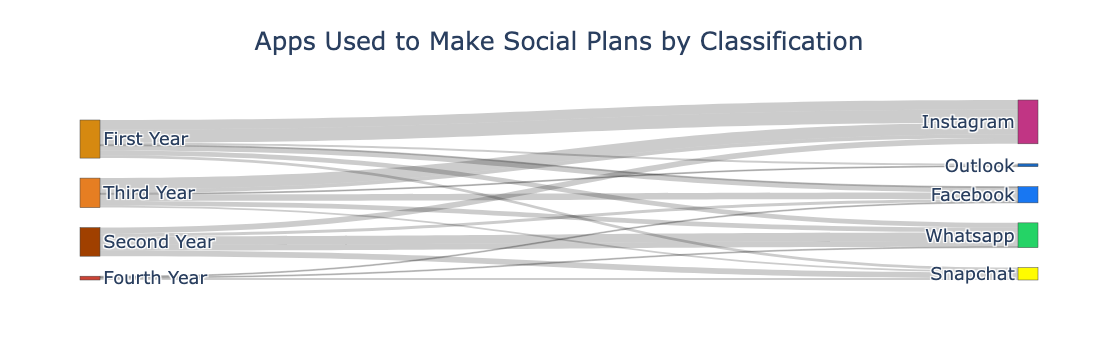

In [31]:
# plotted with the help of StackOverflow thread: https://stackoverflow.com/questions/70293723/how-do-i-make-a-simple-multi-level-sankey-diagram-with-plotly

import pandas as pd
import plotly.graph_objects as go
import plotly.io as pio


label_list = ['First Year', 'Second Year', 'Third Year', 'Fourth Year', 'Super Senior+', 'Instagram', 'Facebook','Whatsapp', 'Outlook','Snapchat','Word of mouth from friends', 'none']
num_participants = [13, 16, 15, 17, 5] # number of participants per class

source = [0,0,0,0,0,0,0, 
          1,1,1,1,1,1,1, 
          2,2,2,2,2,2,2, 
          3,3,3,3,3,3,3,
          4,4,4,4,4,4,4]

target = [5,6,7,8,9, 
          5,6,7,8,9, 
          5,6,7,8,9,
          5,6,7,8,9, 
          5,6,7,8,9,
         ]

count = [20, 2, 10,4,6, 
        28,10,18,0,12,
         12,6,12,0,4,
         24,14,10,2,0,
         8,2,2,0,4
         
        ]

fig = go.Figure(data=[go.Sankey(
    node = {"label": label_list},
    link = {"source": source, "target": target, "value": count}
    )])

color_for_nodes = ["#d68910","#a04000","#e67e22","#cb4335","maroon", "#c13584", "#1877F2", "#25d366","#1967bf", "#fffc00"]
fig.update_traces(node_color = color_for_nodes)

fig.update_layout(title_text="Apps Used to Make Social Plans by Classification ", font_size=18, title_x=0.5)

fig.show()
pio.write_image(fig, 'filename.png', width=700, height=775)

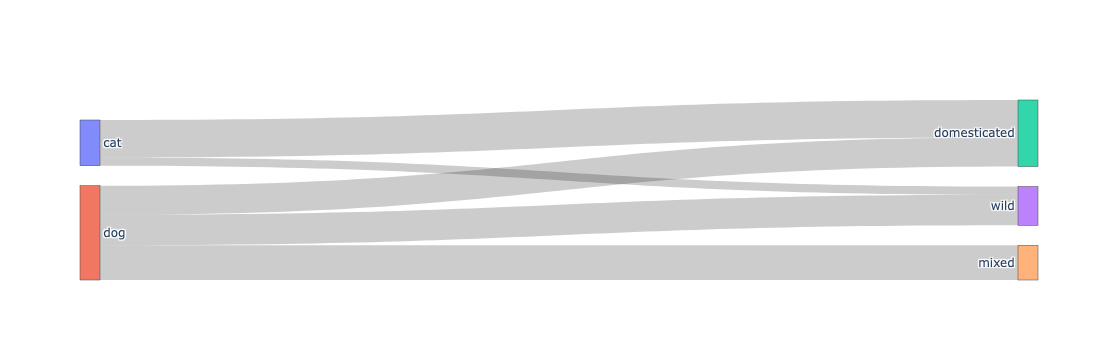

In [40]:
## Example: 

import pandas as pd
import plotly.graph_objects as go

# Define nodes (2 layers)
label_list = ['cat', 'dog', 'domesticated', 'wild', 'mixed']

# Define direct connections between layers
# cat: 0, dog: 1, domesticated: 2, wild: 3
source = [0, 0, 1, 1, 1]  # Only 'cat' and 'dog' as sources
target = [2, 3, 2, 3, 4]  # Only 'domesticated' and 'wild' as targets
count = [27, 6, 21, 22, 25]  # Corresponding flow values

# Create the Sankey diagram
fig = go.Figure(data=[go.Sankey(
    node = {"label": label_list},
    link = {"source": source, "target": target, "value": count}
)])
fig.show()


/var/folders/sy/rsdlpkcs5491kzyzwzyw7ypc0000gn/T/ipykernel_7928/2116252149.py:5: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



<Figure size 1000x600 with 0 Axes>

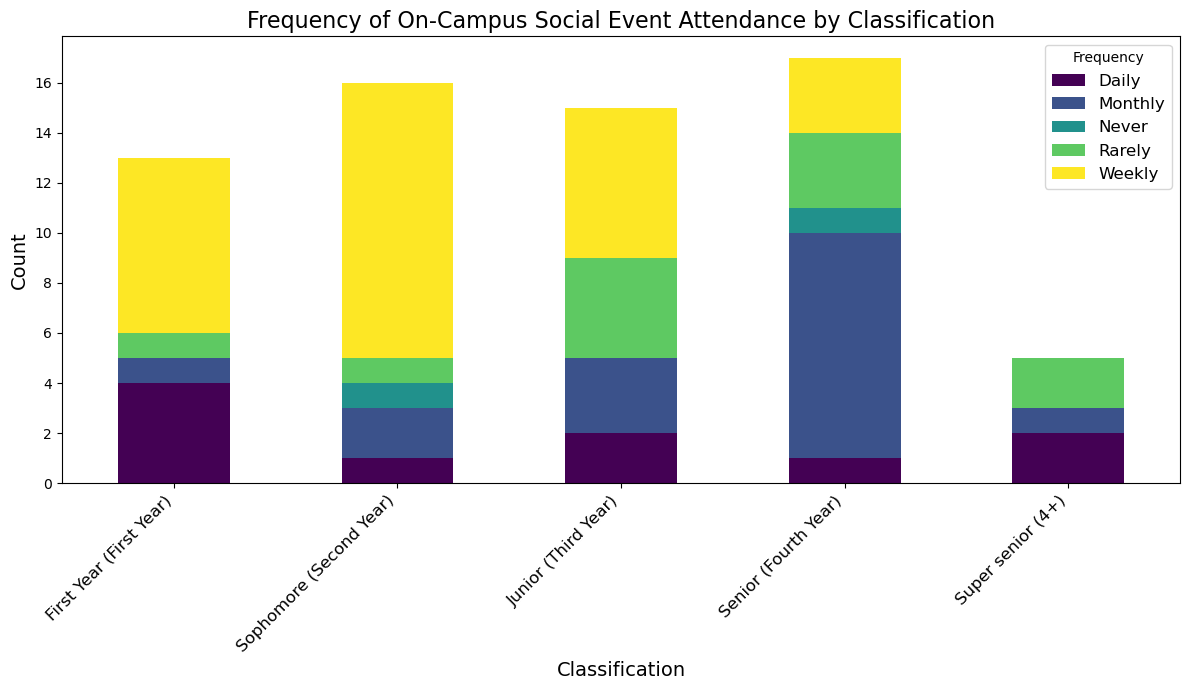

In [29]:

import matplotlib.pyplot as plt
import seaborn as sns

grouped_data = df.groupby(["classification", "freq_social_oncampus"]).size().unstack(fill_value=0)

plt.figure(figsize=(10, 6))
grouped_data.plot(kind="bar", stacked=True, figsize=(12, 7), colormap="viridis")

plt.title("Frequency of On-Campus Social Event Attendance by Classification", fontsize=16)
plt.xlabel("Classification", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=45, ha="right", fontsize=12)
plt.legend(title="Frequency", fontsize=12)
plt.tight_layout()

plt.show()
